In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import numpy as np

In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from scipy.stats import zscore

In [7]:
import seaborn as sns

In [105]:
#Init signature: KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
#leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)

NNH=KNeighborsClassifier(n_neighbors=5)

In [246]:
bc_df= pd.read_csv("C:\\Users\\rames\\Desktop\\Python\\GLIM\\3 Supervised Learning\\wisc_bc_data-1.csv")

In [247]:
bc_df.shape

(569, 32)

In [248]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [249]:
# by converting from object type to category all the Diagnosys M and B are changed to 1 and 0 in the alphbettic order

bc_df['diagnosis']=bc_df.diagnosis.astype('category')
bc_df.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [250]:
bc_df.shape

(569, 32)

In [251]:
bc_df.describe().transpose()

import math as mt



In [252]:
new_area_mean=bc_df.radius_mean**2*mt.pi
new_area_mean

0       476.838473
1       352.989351
2       382.902339
3       399.731223
4       724.878837
5       420.548986
6       416.198509
7       599.152299
8       345.701170
9       384.290923
10     1331.872236
11      471.435248
12      542.426131
13      535.021083
14     1205.643044
15      668.744859
16      775.357947
17      504.316413
18     1267.972242
19      466.828416
20      430.788065
21      429.317800
22      375.997119
23      716.314541
24      347.020639
25      598.284905
26      568.321965
27      735.415424
28      289.891204
29      564.104377
          ...     
539     422.732707
540     908.988733
541     271.424259
542     497.177144
543    1299.725890
544    1279.358316
545     526.852942
546     251.649426
547     511.506576
548     620.158244
549     456.167107
550     518.747633
551     389.870392
552     487.737286
553     433.736136
554     548.220799
555    1467.098951
556     415.475628
557     677.943442
558     385.682020
559     688.134455
560     637.

In [253]:
bc_df['radious_area']=new_area_mean

In [254]:
bc_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B       12.320         12.39           78.85   
1      8910251         B       10.600         18.95           69.28   
2       905520         B       11.040         16.83           70.92   
3       868871         B       11.280         13.39           73.00   
4      9012568         B       15.190         13.21           97.65   
5       906539         B       11.570         19.04           74.20   
6       925291         B       11.510         23.93           74.52   
7        87880         M       13.810         23.75           91.56   
8       862989         B       10.490         19.29           67.41   
9        89827         B       11.060         14.96           71.49   
10       91485         M       20.590         21.24          137.80   
11     8711003         B       12.250         17.94           78.27   
12     9113455         B       13.140         20.74           85.98   
13      857810         B       13.050         19.31           82.61   
14     9111805         M       19.590         25.00          127.70   
15      925277         B       14.590         22.68           96.39   
16      867387         B       15.710         13.93          102.00   
17    89511502         B       12.670         17.30           81.25   
18    89263202         M       20.090         23.86          134.70   
19      866714         B       12.190         13.29           79.08   
20      874373         B       11.710         17.19           74.68   
21      919812         B       11.690         24.44           76.37   
22      904971         B       10.940         18.59           70.39   
23      866458         B       15.100         16.39           99.58   
24      864292         B       10.510         20.19           68.64   
25      859983         M       13.800         15.79           90.43   
26      862009         B       13.450         18.30           86.60   
27      852973         M       15.300         25.27          102.40   
28      898143         B        9.606         16.84           61.64   
29     9010877         B       13.400         16.95           85.48   
..         ...       ...          ...           ...             ...   
539     862485         B       11.600         12.84           74.34   
540     879830         M       17.010         20.26          109.70   
541     917092         B        9.295         13.90           59.96   
542    8912521         B       12.580         18.40           79.83   
543     895100         M       20.340         21.51          135.90   
544    8610862         M       20.180         23.97          143.70   
545     891670         B       12.950         16.02           83.14   
546     864726         B        8.950         15.76           58.74   
547    9010598         B       12.760         18.84           81.87   
548     925292         B       14.050         27.15           91.38   
549     857155         B       12.050         14.63           78.04   
550     905190         B       12.850         21.37           82.63   
551     901011         B       11.140         14.07           71.24   
552   84501001         M       12.460         24.04           83.97   
553      91858         B       11.750         17.56           75.89   
554    9112367         B       13.210         25.25           84.10   
555     903516         M       21.610         22.28          144.40   
556   88518501         B       11.500         18.45           73.28   
557     906564         B       14.690         13.98           98.22   
558     871641         B       11.080         14.71           70.21   
559    9110944         B       14.800         17.66           95.88   
560     854268         M       14.250         21.72           93.63   
561   89511501         B       12.200         15.21           78.01   
562    9113156         B       14.400         26.99           92.25   
563     894855         B       12.86

In [255]:
bc_df=bc_df.drop(labels='id', axis=1)

In [256]:
bc_df.shape

(569, 32)

In [257]:
bc_feature_df=bc_df.drop(labels='diagnosis',axis=1)

In [258]:
bc_feature_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean      ...       texture_worst  perimeter_worst  area_worst  \
0         0.05955      ...               15.64            86.97       549.1   
1         0.06491      ...               22.94            78.28       424.8   
2         0.06340      ...               26.44            79.93       471.4   
3         0.06072      ...               15.77            76.53       434.0   
4         0.05544      ...               15.73           104.50       819.1   

   smoothness_worst  compactness_worst  concavity_worst  points_worst  \
0            0.1385             0.1266          0.12420       0.09391   
1            0.1213             0.2515          0.19160       0.07926   
2            0.1369             0.1482          0.10670       0.07431   
3            0.1367             0.1822          0.08669       0.08611   
4            0.1126             0.1737          0.13620       0.08178   

   symmetry_worst  dimension_worst  radious_area  
0          0.2827          0.06771    476.838473  
1          0.2940          0.07587    352.989351  
2          0.2998          0.07881    382.902339  
3          0.2102          0.06784    399.731223  
4          0.2487          0.06766    724.878837  

[5 rows x 31 columns]

In [259]:
bc_feature_df_z=bc_feature_df.apply(zscore)
bc_feature_df_z.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.162905e-16 -7.373520e-16   -1.303390e-16 -2.239958e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean   points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02  5.690000e+02   
mean      1.598019e-16      1.730699e-16    3.707247e-17 -5.775501e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00  1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00 -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01 -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01 -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01  6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00  3.927930e+00   

       symmetry_mean  dimension_mean      ...       texture_worst  \
count   5.690000e+02    5.690000e+02      ...        5.690000e+02   
mean    1.449729e-16   -1.523630e-15      ...        6.634022e-18   
std     1.000880e+00    1.000880e+00      ...        1.000880e+00   
min    -2.744117e+00   -1.819865e+00      ...       -2.223994e+00   
25%    -7.032397e-01   -7.226392e-01      ...       -7.486293e-01   
50%    -7.162650e-02   -1.782793e-01      ...       -4.351564e-02   
75%     5.307792e-01    4.709834e-01      ...        6.583411e-01   
max     4.484751e+00    4.910919e+00      ...        3.885905e+00   

       perimeter_worst    area_worst  smoothness_worst  compactness_worst  \
count     5.690000e+02  5.690000e+02      5.690000e+02       5.690000e+02   
mean     -3.570665e-16 -1.888745e-16     -2.265323e-16      -4.487720e-18   
std       1.000880e+00  1.000880e+00      1.000880e+00       1.000880e+00   
min      -1.693361e+00 -1.222423e+00     -2.682695e+00      -1.443878e+00   
25%      -6.895783e-01 -6.421359e-01     -6.912304e-01      -6.810833e-01   
50%      -2.859802e-01 -3.411812e-01     -4.684277e-02      -2.695009e-01   
75%       5.402790e-01  3.575891e-01      5.975448e-01       5.396688e-01   
max       4.287337e+00  5.930172e+00      3.955374e+00       5.112877e+00   

       concavity_worst  points_worst  symmetry_worst  dimension_worst  \
count     5.690000e+02  5.690000e+02    5.690000e+02     5.690000e+02   
mean      9.112024e-17  2.302396e-16    2.718973e-16     1.882891e-16   
std       1.000880e+00  1.000880e+00    1.000880e+00     1.000880e+00   
min      -1.305831e+00 -1.745063e+00   -2.160960e+00    -1.601839e+00   
25%      -7.565142e-01 -7.563999e-01   -6.418637e-01    -6.919118e-01   
50%      -2.182321e-01 -2.234689e-01   -1.274095e-01    -2.164441e-01   
75%       5.311411e-01  7.125100e-01    4.501382e-01     4.507624e-01   
max       4.700669e+00  2.685877e+00    6.046041e+00     6.846856e+00   

       radious_area  
count  5.690000e+02  
mean  -2.263372e-17  
std    1.000880e+00  
min   -1.451421e+00  
25%   -6.676150e-01  
50%   -2.953695e-01  
75%    3.292481e-01  
max    5.140823e+00  

[8 rows x 31 columns]

In [260]:
#capture class values from the diagnosis  column into a pandas series akin to array
bc_labels = bc_df['diagnosis']

In [261]:
#stroe the normalized feature data into np array
X=np.array(bc_feature_df_z)
X.shape

(569, 31)

In [262]:
y=np.array(bc_labels)
y.shape

(569,)

In [263]:
#split X and Y in training and test set in 75:25 ration

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_test.itemsize)

8


In [264]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [265]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point


pridict_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)
# The Score does is here is for every test record takes the pridected value of y and compares with actualy value of y give the score
# Dont get carried away by this, when ever the classes are skewed catagory one is underepresented and catogery two is over
# represented you should be never relay on the over all accuracy this is over all accuracy


0.9649122807017544

In [266]:
# you should relay on the class acccuracy 
# calculate accuracy measures and confusion matrix

from sklearn import metrics

print(metrics.confusion_matrix(y_test, pridict_labels))

# from the confusion mtrix if calcualte the Rcall (53/Row Total)= 93%, and calculate the Precision = (53/Column total= 96%)

[[112   2]
 [  4  53]]


In [267]:
# but expeceted is 99.999% 

# to improve the performance -------iteration2------


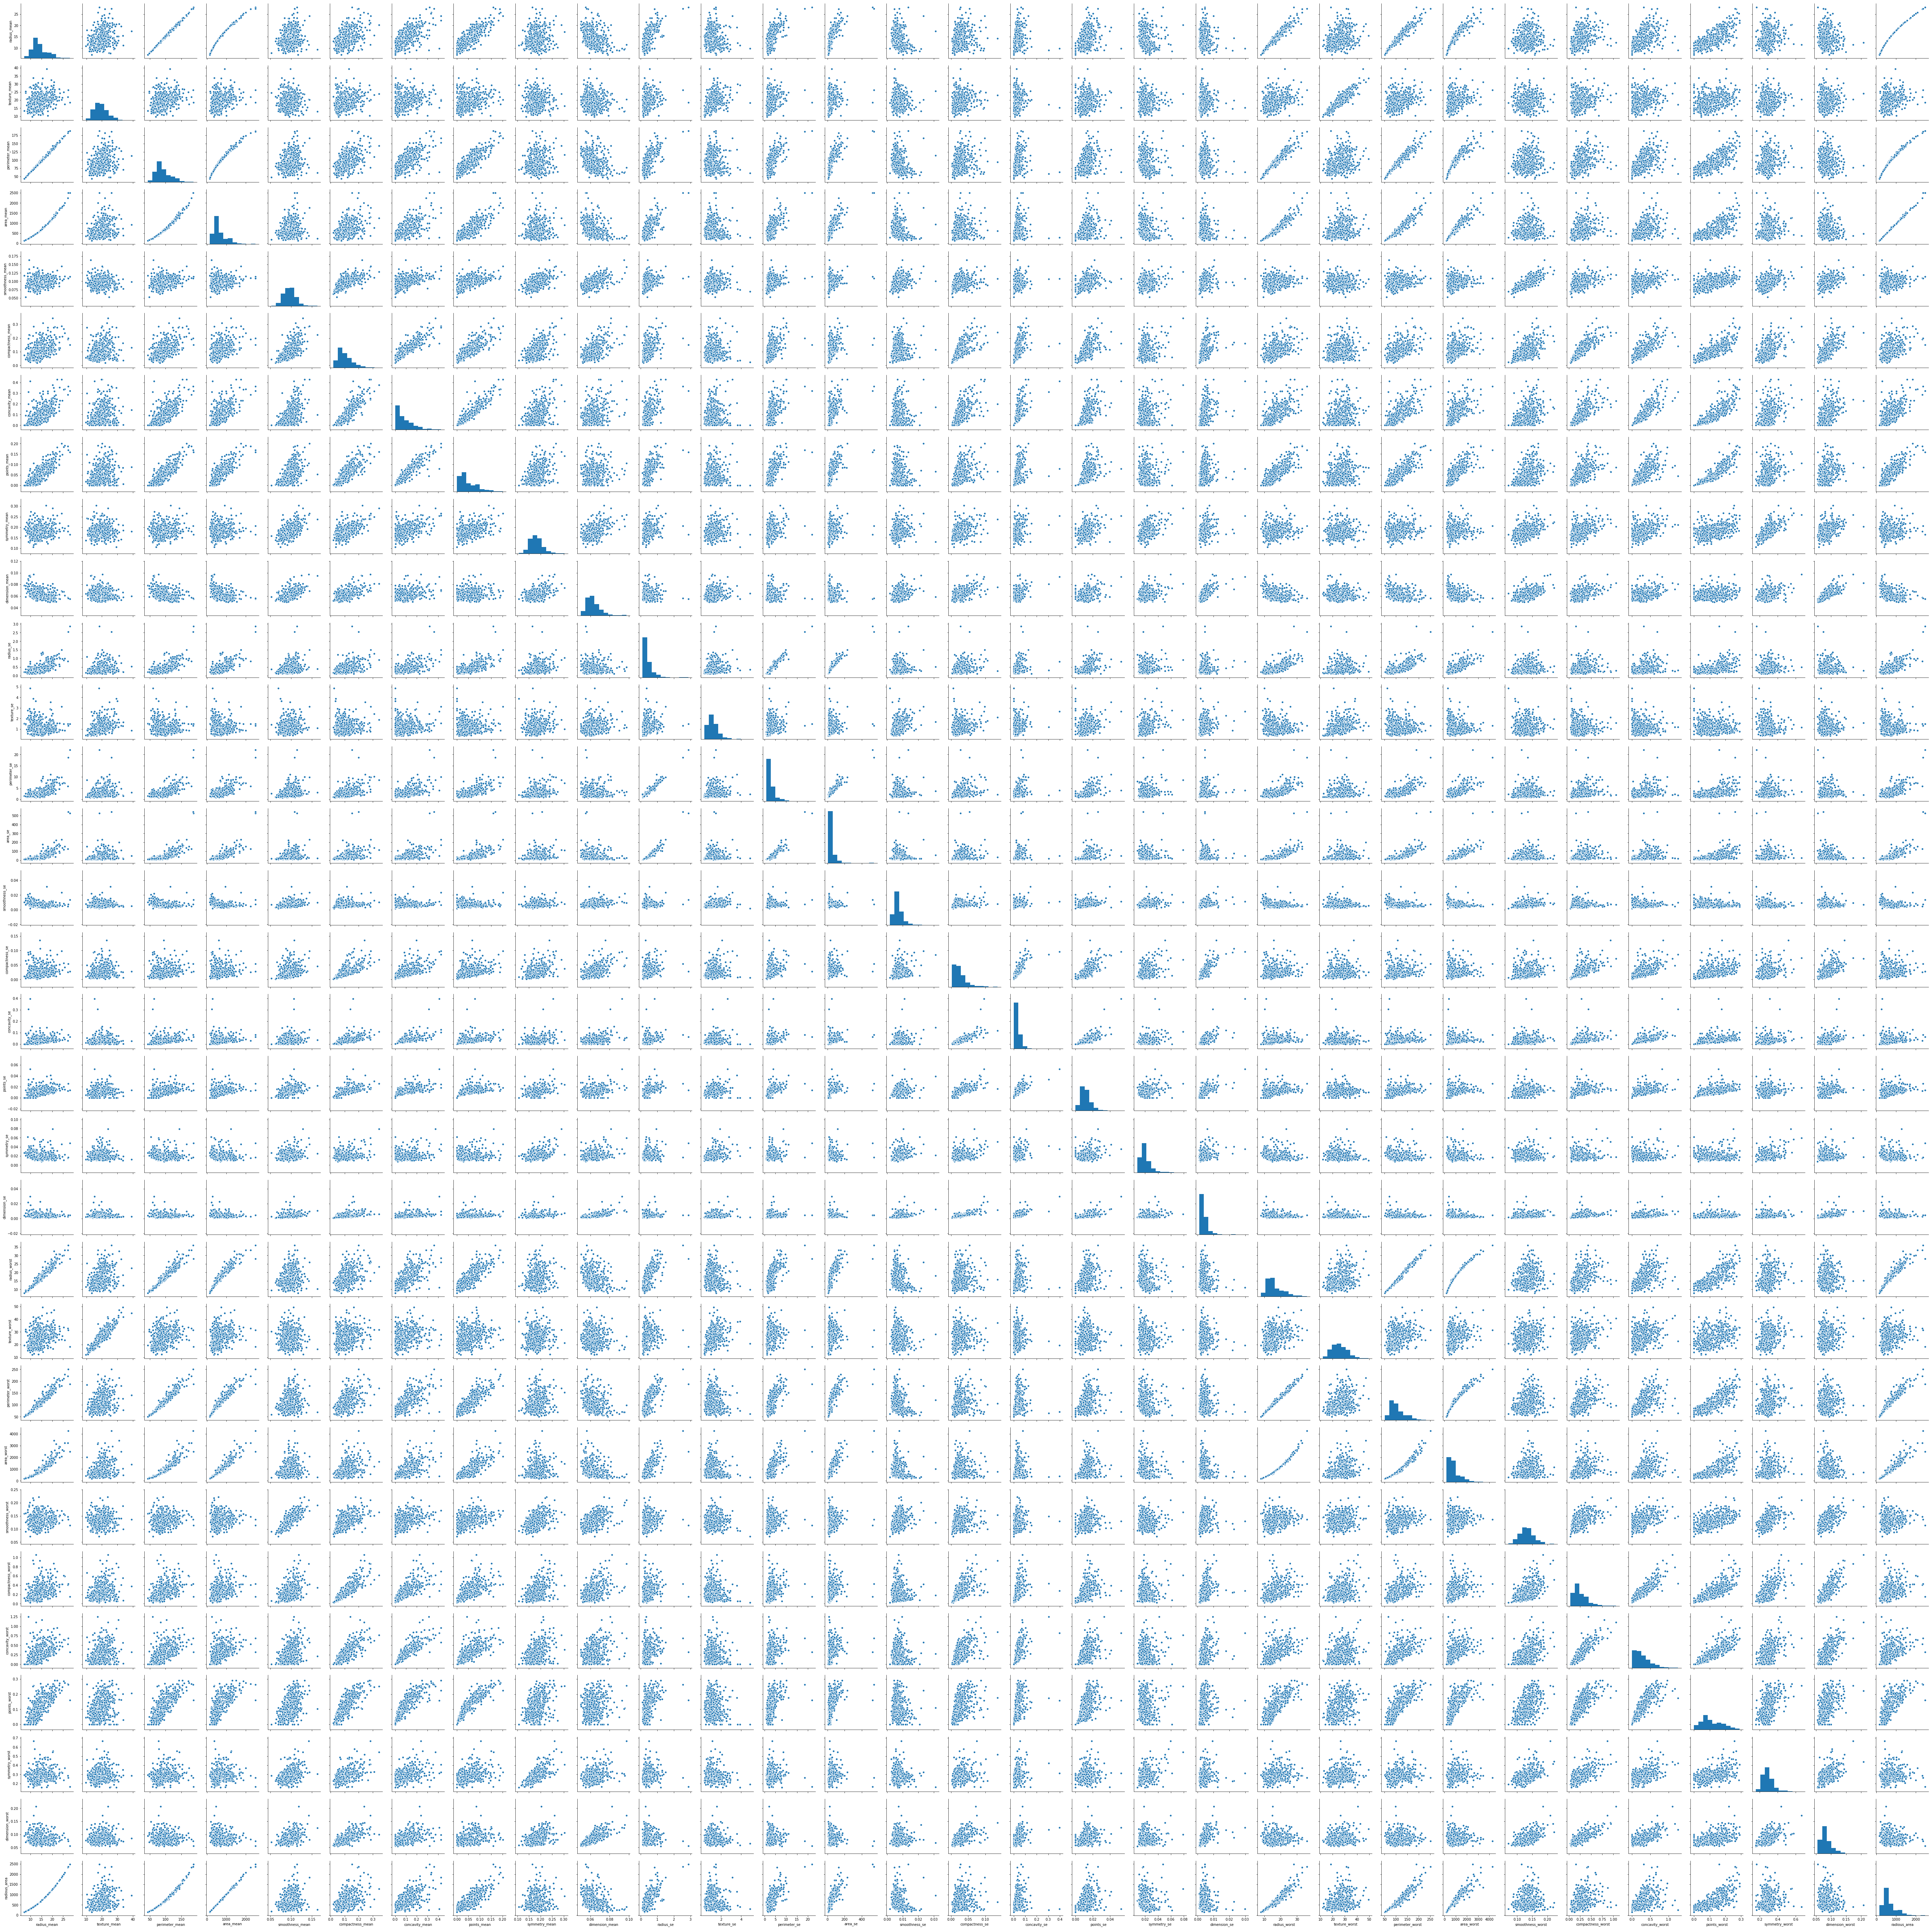

In [268]:
#let us analyze the different attribuits for distribution and correlation by using scatter matrix 

sns.pairplot(bc_df)

In [269]:
# by obeserving the pair plot closly with the self distrubuition in diagnaly we can see come of the parameters are not 
# Distribuited properly
# And check out the the relation between the radious mean and Perimeter Mean and Area mean we can see there is almost linear 
# Relations ship
# and since the data is hand recoded by the human there we can see there are errors in linear relation of radious and parimeter 
# area - which should be a single stirght line


# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [271]:
# to drop the dpendent column from bc_df

bc_feature_pruned_df_z= bc_feature_df_z.drop(['area_mean'], axis=1)

In [272]:
X=np.array(bc_feature_pruned_df_z)

In [273]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [274]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [275]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

pridict_labels=NNH.predict(X_test)

In [276]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
NNH.score(X_test, y_test)

0.9649122807017544

In [277]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, pridict_labels))

[[112   2]
 [  4  53]]


In [278]:
NNH1=KNeighborsClassifier(n_neighbors=5, algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X)} )

In [279]:
NNH1.fit(X_train, y_train )

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'V': array([[ 0.24798,  0.06539, ...,  0.15331,  0.0215 ],
       [ 0.06539,  0.33206, ..., -0.02561, -0.32421],
       ...,
       [ 0.15331, -0.02561, ...,  0.21477,  0.18674],
       [ 0.0215 , -0.32421, ...,  0.18674,  0.81165]])},
           n_jobs=1, n_neighbors=5, p=2, weights='uniform')

In [280]:
pridict_labels1=NNH1.predict(X_test)

In [281]:
NNH1.score(X_test,y_test)

0.8011695906432749

In [282]:
print(metrics.confusion_matrix(y_test,pridict_labels1))

[[113   1]
 [ 33  24]]
